In [1]:
import pandas as pd
from datetime import datetime

dataset=pd.read_csv("./delivery_data.csv")

dataset.info()
dataset.describe()
dataset.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14554 entries, 0 to 14553
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            14554 non-null  int64  
 1   SERVICETYPE           14340 non-null  object 
 2   VEHICLETYPE           14331 non-null  object 
 3   DEPARTURE_COUNTRY     14554 non-null  object 
 4   DEPARTURE_ZIPCODE     14548 non-null  float64
 5   ARRIVAL_COUNTRY       14554 non-null  object 
 6   ARRIVAL_ZIPCODE       14554 non-null  int64  
 7   SHIPPING_DATE         14554 non-null  object 
 8   GROSS_WEIGHT_KG       14554 non-null  float64
 9   NET_WEIGHT_KG         14554 non-null  float64
 10  VOLUME_M3             14554 non-null  float64
 11  DECLARED_DISTANCE_KM  11577 non-null  float64
 12  ACTUAL_DELIVERY_DATE  14554 non-null  object 
 13  DELIVERY_TIME_HH      14554 non-null  int64  
 14  WDAY                  14554 non-null  int64  
dtypes: float64(5), int6

,Unnamed: 0,SERVICETYPE,VEHICLETYPE,DEPARTURE_COUNTRY,DEPARTURE_ZIPCODE,ARRIVAL_COUNTRY,ARRIVAL_ZIPCODE,SHIPPING_DATE,GROSS_WEIGHT_KG,NET_WEIGHT_KG,VOLUME_M3,DECLARED_DISTANCE_KM,ACTUAL_DELIVERY_DATE,DELIVERY_TIME_HH,WDAY
0,1,NaN,NaN,IT,62010.0,IT,20121,2023-01-11 00:00:14,7.30,7.00,0.0,NaN,2022-11-16 00:00:14,-1344,2
1,2,NaN,NaN,IT,62010.0,IT,15069,2023-01-11 00:00:14,1.70,1.40,0.0,NaN,2022-11-16 00:00:14,-1344,2
2,3,NaN,NaN,IT,62010.0,IT,10036,2023-01-11 00:00:14,0.72,0.42,0.0,NaN,2022-11-17 00:00:14,-1320,2
3,4,NaN,NaN,IT,62010.0,IT,70121,2023-01-11 00:00:14,0.86,0.56,0.0,NaN,2022-11-16 00:00:14,-1344,2
4,5,NaN,NaN,IT,62010.0,IT,20090,2023-01-11 00:00:14,0.58,0.28,0.0,NaN,2022-11-16 00:00:14,-1344,2


In [2]:
# # Crea un nuovo dataset senza valori nulli
# cleaned_dataset = dataset.dropna()

# # Mostra informazioni sul nuovo dataset
# print(cleaned_dataset.info())


# # Salva il nuovo dataset in un file CSV (opzionale)
# cleaned_dataset.to_csv("./cleaned_delivery_data.csv", index=False)


In [3]:
import pandas as pd


# Rimuovi i millisecondi dalla colonna 'SHIPPING_DATE'
dataset['SHIPPING_DATE'] = dataset['SHIPPING_DATE'].astype(str).str.replace(r'\.\d+', '', regex=True)
# Rimuovi i millisecondi dalla colonna 'ACTUAL_DELIVERY_DATE'
dataset['ACTUAL_DELIVERY_DATE'] = dataset['ACTUAL_DELIVERY_DATE'].astype(str).str.replace(r'\.\d+', '', regex=True)


# Supponiamo che 'dataset' sia già definito e contenga i dati pertinenti
# dataset['SHIPPING_DATE'] = pd.to_datetime(dataset['SHIPPING_DATE']) # Se necessario, converti la data
dataset['ACTUAL_DELIVERY_DATE'] = pd.to_datetime(dataset['ACTUAL_DELIVERY_DATE'])
dataset['SHIPPING_DATE'] = pd.to_datetime(dataset['SHIPPING_DATE'])


# Identifica i record con tempo di consegna negativo
negative_delivery_condition = dataset['DELIVERY_TIME_HH'] < 0
# Inverti le date per i record identificati
dataset.loc[negative_delivery_condition, ['SHIPPING_DATE', 'ACTUAL_DELIVERY_DATE']] = dataset.loc[negative_delivery_condition, ['ACTUAL_DELIVERY_DATE', 'SHIPPING_DATE']].values
# Ricalcola il tempo di consegna dopo l'inversione
dataset['DELIVERY_TIME_HH'] = (dataset['ACTUAL_DELIVERY_DATE'] - dataset['SHIPPING_DATE']).dt.total_seconds() / 3600


# Arrotonda a 2 cifre decimali
dataset['DELIVERY_TIME_HH'] = dataset['DELIVERY_TIME_HH'].round(0)



# Filtra il dataset per il tipo di servizio
service_data = dataset[dataset["SERVICETYPE"].notnull()]

# Corriere espresso
corriere_data = service_data[service_data["SERVICETYPE"] == "Corriere espresso"]
# Rimuovi viaggi da IT a US e viceversa
corriere_data = corriere_data[
    (corriere_data["DEPARTURE_COUNTRY"] != "IT") | (corriere_data["ARRIVAL_COUNTRY"] != "US") &
    (corriere_data["DEPARTURE_COUNTRY"] != "US") | (corriere_data["ARRIVAL_COUNTRY"] != "IT")
]
if not corriere_data.empty:
    corriere_data.to_csv("delivery_CorriereEspresso.csv", index=False)
    print("File 'delivery_CorriereEspresso.csv' creato con successo.")

# Via gomma
via_gomma_data = service_data[service_data["SERVICETYPE"] == "Via gomma"]
# Rimuovi viaggi da IT a US e viceversa
via_gomma_data = via_gomma_data[
    (via_gomma_data["DEPARTURE_COUNTRY"] != "IT") | (via_gomma_data["ARRIVAL_COUNTRY"] != "US") &
    (via_gomma_data["DEPARTURE_COUNTRY"] != "US") | (via_gomma_data["ARRIVAL_COUNTRY"] != "IT")
]
if not via_gomma_data.empty:
    via_gomma_data.to_csv("delivery_ViaGomma.csv", index=False)
    print("File 'delivery_ViaGomma.csv' creato con successo.")

# E-commerce
ecommerce_data = service_data[service_data["SERVICETYPE"] == "E-commerce"]
# Rimuovi viaggi da IT a US e viceversa
ecommerce_data = ecommerce_data[
    (ecommerce_data["DEPARTURE_COUNTRY"] != "IT") | (ecommerce_data["ARRIVAL_COUNTRY"] != "US") &
    (ecommerce_data["DEPARTURE_COUNTRY"] != "US") | (ecommerce_data["ARRIVAL_COUNTRY"] != "IT")
]
if not ecommerce_data.empty:
    ecommerce_data.to_csv("delivery_Ecommerce.csv", index=False)
    print("File 'delivery_Ecommerce.csv' creato con successo.")

File 'delivery_CorriereEspresso.csv' creato con successo.
File 'delivery_ViaGomma.csv' creato con successo.
File 'delivery_Ecommerce.csv' creato con successo.


In [4]:

dataset=pd.read_csv("./delivery_CorriereEspresso.csv")

corriere_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2982 entries, 6 to 14496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            2982 non-null   int64         
 1   SERVICETYPE           2982 non-null   object        
 2   VEHICLETYPE           2973 non-null   object        
 3   DEPARTURE_COUNTRY     2982 non-null   object        
 4   DEPARTURE_ZIPCODE     2982 non-null   float64       
 5   ARRIVAL_COUNTRY       2982 non-null   object        
 6   ARRIVAL_ZIPCODE       2982 non-null   int64         
 7   SHIPPING_DATE         2982 non-null   datetime64[ns]
 8   GROSS_WEIGHT_KG       2982 non-null   float64       
 9   NET_WEIGHT_KG         2982 non-null   float64       
 10  VOLUME_M3             2982 non-null   float64       
 11  DECLARED_DISTANCE_KM  2828 non-null   float64       
 12  ACTUAL_DELIVERY_DATE  2982 non-null   datetime64[ns]
 13  DELIVERY_TIME_HH      

In [5]:

dataset=pd.read_csv("./delivery_Ecommerce.csv")

ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7982 entries, 41 to 14547
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            7982 non-null   int64         
 1   SERVICETYPE           7982 non-null   object        
 2   VEHICLETYPE           7982 non-null   object        
 3   DEPARTURE_COUNTRY     7982 non-null   object        
 4   DEPARTURE_ZIPCODE     7982 non-null   float64       
 5   ARRIVAL_COUNTRY       7982 non-null   object        
 6   ARRIVAL_ZIPCODE       7982 non-null   int64         
 7   SHIPPING_DATE         7982 non-null   datetime64[ns]
 8   GROSS_WEIGHT_KG       7982 non-null   float64       
 9   NET_WEIGHT_KG         7982 non-null   float64       
 10  VOLUME_M3             7982 non-null   float64       
 11  DECLARED_DISTANCE_KM  5779 non-null   float64       
 12  ACTUAL_DELIVERY_DATE  7982 non-null   datetime64[ns]
 13  DELIVERY_TIME_HH     

In [6]:

dataset=pd.read_csv("./delivery_ViaGomma.csv")

via_gomma_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1863 entries, 13 to 14413
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            1863 non-null   int64         
 1   SERVICETYPE           1863 non-null   object        
 2   VEHICLETYPE           1863 non-null   object        
 3   DEPARTURE_COUNTRY     1863 non-null   object        
 4   DEPARTURE_ZIPCODE     1857 non-null   float64       
 5   ARRIVAL_COUNTRY       1863 non-null   object        
 6   ARRIVAL_ZIPCODE       1863 non-null   int64         
 7   SHIPPING_DATE         1863 non-null   datetime64[ns]
 8   GROSS_WEIGHT_KG       1863 non-null   float64       
 9   NET_WEIGHT_KG         1863 non-null   float64       
 10  VOLUME_M3             1863 non-null   float64       
 11  DECLARED_DISTANCE_KM  1847 non-null   float64       
 12  ACTUAL_DELIVERY_DATE  1863 non-null   datetime64[ns]
 13  DELIVERY_TIME_HH     

In [7]:
# import pandas as pd
# import requests
# from geopy.geocoders import Nominatim
# from typing import Optional, Tuple
# from tqdm import tqdm  # Importa tqdm per la barra di progresso

# # Carica il dataset
# dataSet = pd.read_csv("delivery_Ecommerce.csv")

# def get_osrm_distance(coord1, coord2):
#     # Coordinate devono essere in formato (long, lat)
#     url = f"http://router.project-osrm.org/route/v1/driving/{coord1[1]},{coord1[0]};{coord2[1]},{coord2[0]}"
   
#     response = requests.get(url)
#     data = response.json()
   
#     # Controlla se la risposta contiene la chiave 'routes'
#     if 'routes' in data and len(data['routes']) > 0:
#         # Distanza in metri, convertita in chilometri
#         distance_km = data['routes'][0]['distance'] / 1000
#         duration_seconds = data['routes'][0]['duration']
#         return round(distance_km, 2), duration_seconds
#     else:
#         print(f"Error: No routes found for coordinates {coord1} to {coord2}. Response: {data}")
#         return None, None  # Restituisci None se non ci sono percorsi

# def get_zipcode_coordinates(zipcode: str, country) -> Optional[Tuple[float, float]]:
#     try:
#         geolocator = Nominatim(user_agent="my_distance_calculator")
#         location = geolocator.geocode(f"{zipcode}, {country}")
       
#         if location:
#             return (location.latitude, location.longitude)
#         return None
       
#     except Exception as e:
#         print(f"Error getting coordinates for {zipcode}: {str(e)}")
#         return None

# # Filtra il DataFrame per le righe con DECLARED_DISTANCE_KM vuote o uguali a 0
# filtered_data = dataSet[dataSet['DECLARED_DISTANCE_KM'].isna() | (dataSet['DECLARED_DISTANCE_KM'] == 0)]

# # Itera attraverso il dataset filtrato con una barra di progresso
# for index, row in tqdm(filtered_data.iterrows(), total=filtered_data.shape[0]):
#     departure_country = row['DEPARTURE_COUNTRY']
#     departure_zipcode = row['DEPARTURE_ZIPCODE']
#     arrival_zipcode = row['ARRIVAL_ZIPCODE']
   
#     # Ottieni le coordinate di partenza
#     if departure_country == "IT":
#         coordinataPartenza = get_zipcode_coordinates(departure_zipcode, "IT")
#         coordinataArrivo = get_zipcode_coordinates(arrival_zipcode, "IT")
#     elif departure_country == "US":
#         coordinataPartenza = get_zipcode_coordinates(departure_zipcode, "US")
#         coordinataArrivo = get_zipcode_coordinates(arrival_zipcode, "US")
#     else:
#         print(f"Country {departure_country} not supported for ZIP code {departure_zipcode}.")
#         continue
   
#     if coordinataPartenza and coordinataArrivo:
#         distanza, _ = get_osrm_distance(coordinataPartenza, coordinataArrivo)
#         if distanza is not None:  # Controlla se la distanza è valida
#             dataSet.at[index, 'DECLARED_DISTANCE_KM'] = distanza  # Aggiorna il valore nel DataFrame
#         else:
#             print(f"Could not calculate distance for coordinates {coordinataPartenza} to {coordinataArrivo}.")
#     else:
#         print(f"Could not get coordinates for ZIP codes {departure_zipcode} and {arrival_zipcode}.")

# # Salva il DataFrame aggiornato in un nuovo file CSV
# dataSet.to_csv("delivery_Ecommerce.csv", index=False)

Valori unici in WDAY: [0, 1, 2, 3, 4, 5, 6]

Primi 5 record del dataset:
         SHIPPING_DATE  WDAY  DELIVERY_TIME_HH
0  2023-01-11 00:00:14     2             -1344
1  2023-01-11 00:00:14     2             -1344
2  2023-01-11 00:00:14     2             -1320
3  2023-01-11 00:00:14     2             -1344
4  2023-01-11 00:00:14     2             -1344

Medie per giorno prima del reindex:
Giorno 0: 68.76 ore
Giorno 1: 60.97 ore
Giorno 2: 60.65 ore
Giorno 3: 98.99 ore
Giorno 4: 99.74 ore
Giorno 5: 131.42 ore
Giorno 6: 114.21 ore

Numero di righe per ogni giorno:
WDAY
0    3895
1    3630
2    2476
3    2225
4    1884
5     276
6     168
Name: count, dtype: int64


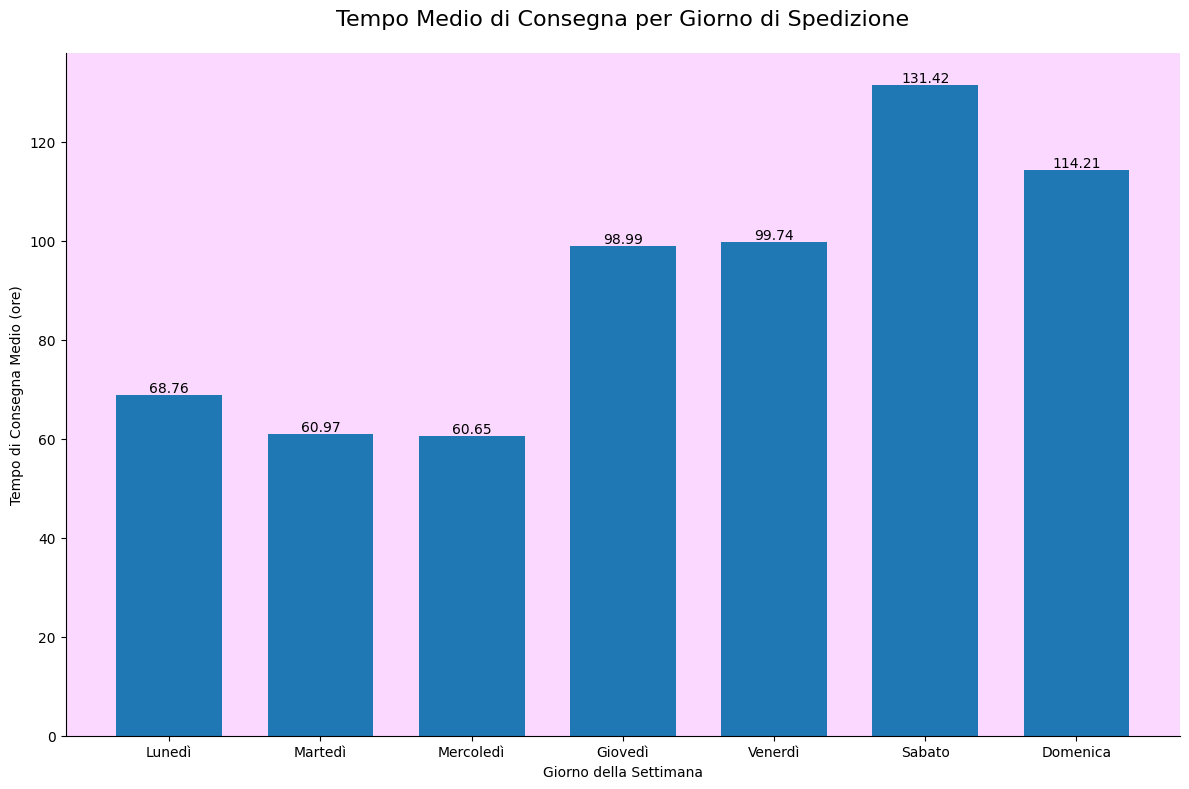

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leggi il CSV
dataset = pd.read_csv('delivery_data.csv')

# Debug: stampa i primi record e i valori unici di WDAY
print("Valori unici in WDAY:", sorted(dataset['WDAY'].unique()))
print("\nPrimi 5 record del dataset:")
print(dataset[['SHIPPING_DATE', 'WDAY', 'DELIVERY_TIME_HH']].head())

# Calcola la media del tempo di consegna per giorno della settimana
average_delivery_time = dataset.groupby('WDAY')['DELIVERY_TIME_HH'].mean()

# Debug: stampa i valori medi prima del reindex
print("\nMedie per giorno prima del reindex:")
for day, value in average_delivery_time.items():
    print(f"Giorno {day}: {value:.2f} ore")

# Ordina i giorni della settimana
weekday_order = [0, 1, 2, 3, 4, 5, 6]
average_delivery_time = average_delivery_time.reindex(weekday_order)


# Creiamo la figura
plt.figure(figsize=(12, 8))

# Creiamo le barre
bars = plt.bar(average_delivery_time.index, average_delivery_time.values, color='#1f77b4', width=0.7)

# Aggiungiamo le etichette sopra ogni barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}',  # Mostra il valore con due decimali
             ha='center', va='bottom')

# Personalizziamo il grafico
plt.title('Tempo Medio di Consegna per Giorno di Spedizione', fontsize=16, color='black', pad=20)
plt.xlabel('Giorno della Settimana', color='black')
plt.ylabel('Tempo di Consegna Medio (ore)', color='black')

# Imposta le etichette per i giorni della settimana
plt.xticks(ticks=range(7), labels=['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
plt.gca().set_facecolor("#FAD8FF")

# Rimuoviamo i bordi
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Aggiustiamo i margini
plt.tight_layout()

# Debug: stampa il conteggio delle righe per ogni giorno
print("\nNumero di righe per ogni giorno:")
print(dataset['WDAY'].value_counts().sort_index())

plt.show()

Valori unici in WDAY: [0, 1, 2, 3, 4]

Primi 5 record del dataset:
         SHIPPING_DATE  WDAY  DELIVERY_TIME_HH
0  2022-11-17 00:00:14     2            1320.0
1  2022-11-17 00:00:14     2            1320.0
2  2022-11-17 00:00:14     2            1320.0
3  2022-11-16 00:00:14     2            1344.0
4  2022-11-24 00:00:14     2            1152.0

Medie per giorno prima del reindex:
Giorno 0: 41.52 ore
Giorno 1: 50.82 ore
Giorno 2: 56.19 ore
Giorno 3: 67.10 ore
Giorno 4: 79.43 ore

Numero di righe per ogni giorno:
WDAY
0    644
1    741
2    603
3    616
4    378
Name: count, dtype: int64


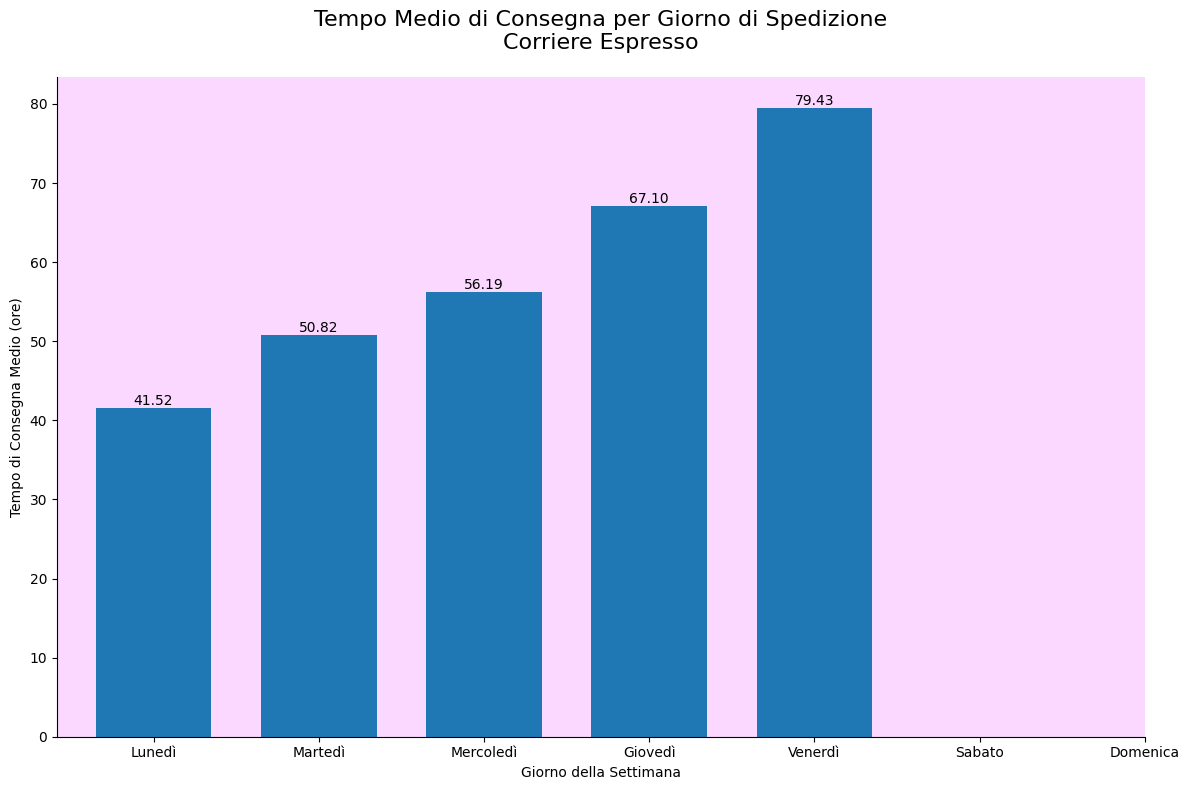

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leggi il CSV
dataset = pd.read_csv('delivery_CorriereEspresso.csv')

# Debug: stampa i primi record e i valori unici di WDAY
print("Valori unici in WDAY:", sorted(dataset['WDAY'].unique()))
print("\nPrimi 5 record del dataset:")
print(dataset[['SHIPPING_DATE', 'WDAY', 'DELIVERY_TIME_HH']].head())

# Calcola la media del tempo di consegna per giorno della settimana
average_delivery_time = dataset.groupby('WDAY')['DELIVERY_TIME_HH'].mean()

# Debug: stampa i valori medi prima del reindex
print("\nMedie per giorno prima del reindex:")
for day, value in average_delivery_time.items():
    print(f"Giorno {day}: {value:.2f} ore")

# Ordina i giorni della settimana
weekday_order = [0, 1, 2, 3, 4]
average_delivery_time = average_delivery_time.reindex(weekday_order)


# Creiamo la figura
plt.figure(figsize=(12, 8))

# Creiamo le barre
bars = plt.bar(average_delivery_time.index, average_delivery_time.values, color='#1f77b4', width=0.7)

# Aggiungiamo le etichette sopra ogni barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}',  # Mostra il valore con due decimali
             ha='center', va='bottom')

# Personalizziamo il grafico
plt.title('Tempo Medio di Consegna per Giorno di Spedizione\nCorriere Espresso', fontsize=16, color='black', pad=20)
plt.xlabel('Giorno della Settimana', color='black')
plt.ylabel('Tempo di Consegna Medio (ore)', color='black')

# Imposta le etichette per i giorni della settimana
plt.xticks(ticks=range(7), labels=['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
plt.gca().set_facecolor("#FAD8FF")

# Rimuoviamo i bordi
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Aggiustiamo i margini
plt.tight_layout()

# Debug: stampa il conteggio delle righe per ogni giorno
print("\nNumero di righe per ogni giorno:")
print(dataset['WDAY'].value_counts().sort_index())

plt.show()

Valori unici in WDAY: [0, 1, 2, 3, 4, 5, 6]

Primi 5 record del dataset:
         SHIPPING_DATE  WDAY  DELIVERY_TIME_HH
0  2023-01-03 00:00:14     1              24.0
1  2023-01-03 00:00:14     1              24.0
2  2023-01-03 00:00:14     1              24.0
3  2023-01-03 00:00:14     1              62.0
4  2023-01-03 00:00:14     1              35.0

Medie per giorno prima del reindex:
Giorno 0: 71.42 ore
Giorno 1: 63.31 ore
Giorno 2: 73.12 ore
Giorno 3: 100.56 ore
Giorno 4: 95.63 ore
Giorno 5: 108.93 ore
Giorno 6: 87.05 ore

Numero di righe per ogni giorno:
WDAY
0    2395
1    2178
2    1192
3    1001
4     982
5     159
6      75
Name: count, dtype: int64


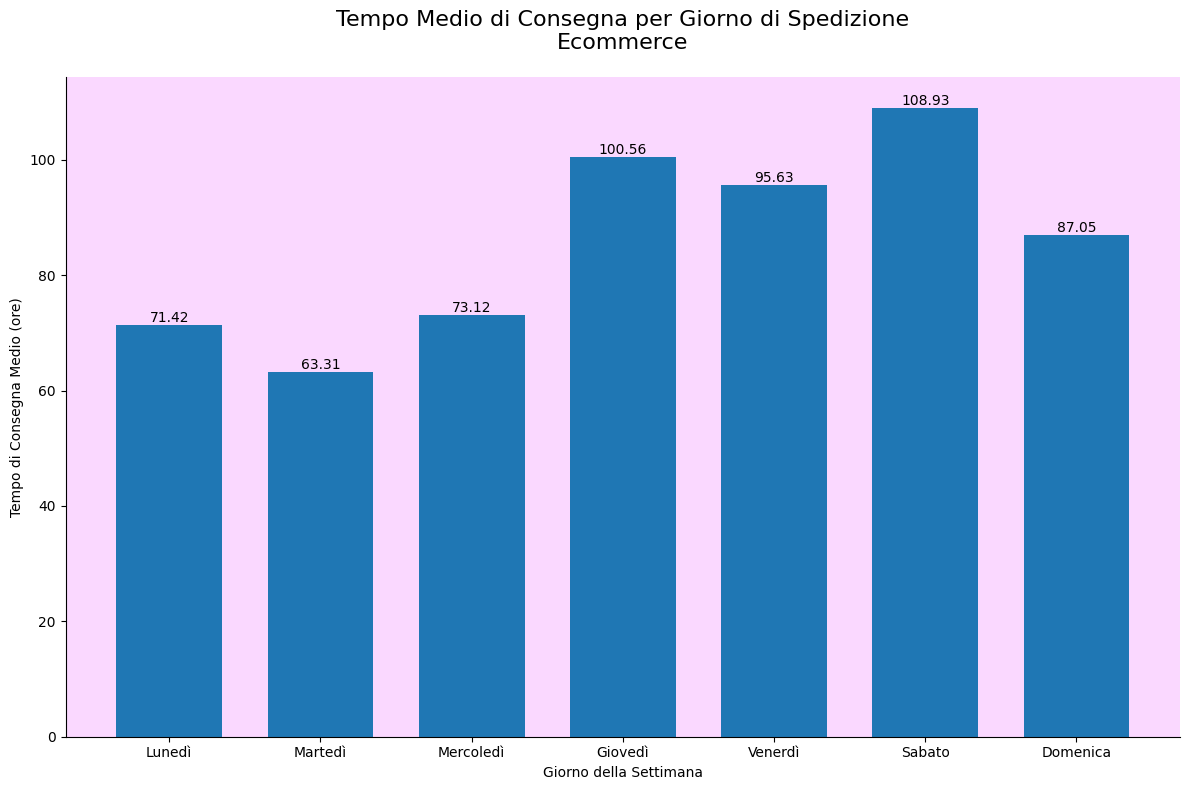

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leggi il CSV
dataset = pd.read_csv('delivery_Ecommerce.csv')

# Debug: stampa i primi record e i valori unici di WDAY
print("Valori unici in WDAY:", sorted(dataset['WDAY'].unique()))
print("\nPrimi 5 record del dataset:")
print(dataset[['SHIPPING_DATE', 'WDAY', 'DELIVERY_TIME_HH']].head())

# Calcola la media del tempo di consegna per giorno della settimana
average_delivery_time = dataset.groupby('WDAY')['DELIVERY_TIME_HH'].mean()

# Debug: stampa i valori medi prima del reindex
print("\nMedie per giorno prima del reindex:")
for day, value in average_delivery_time.items():
    print(f"Giorno {day}: {value:.2f} ore")

# Ordina i giorni della settimana
weekday_order = [0, 1, 2, 3, 4, 5, 6]
average_delivery_time = average_delivery_time.reindex(weekday_order)


# Creiamo la figura
plt.figure(figsize=(12, 8))

# Creiamo le barre
bars = plt.bar(average_delivery_time.index, average_delivery_time.values, color='#1f77b4', width=0.7)

# Aggiungiamo le etichette sopra ogni barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}',  # Mostra il valore con due decimali
             ha='center', va='bottom')

# Personalizziamo il grafico
plt.title('Tempo Medio di Consegna per Giorno di Spedizione\nEcommerce', fontsize=16, color='black', pad=20)
plt.xlabel('Giorno della Settimana', color='black')
plt.ylabel('Tempo di Consegna Medio (ore)', color='black')

# Imposta le etichette per i giorni della settimana
plt.xticks(ticks=range(7), labels=['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
plt.gca().set_facecolor("#FAD8FF")

# Rimuoviamo i bordi
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Aggiustiamo i margini
plt.tight_layout()

# Debug: stampa il conteggio delle righe per ogni giorno
print("\nNumero di righe per ogni giorno:")
print(dataset['WDAY'].value_counts().sort_index())

plt.show()

Valori unici in WDAY: [0, 1, 2, 3, 4]

Primi 5 record del dataset:
         SHIPPING_DATE  WDAY  DELIVERY_TIME_HH
0  2022-12-22 00:00:14     2             480.0
1  2022-12-23 00:00:14     2             456.0
2  2022-12-22 00:00:14     2             480.0
3  2022-12-29 00:00:14     2             312.0
4  2022-12-23 00:00:14     2             456.0

Medie per giorno prima del reindex:
Giorno 0: 70.84 ore
Giorno 1: 77.19 ore
Giorno 2: 109.71 ore
Giorno 3: 123.12 ore
Giorno 4: 105.06 ore

Numero di righe per ogni giorno:
WDAY
0    515
1    409
2    368
3    312
4    259
Name: count, dtype: int64


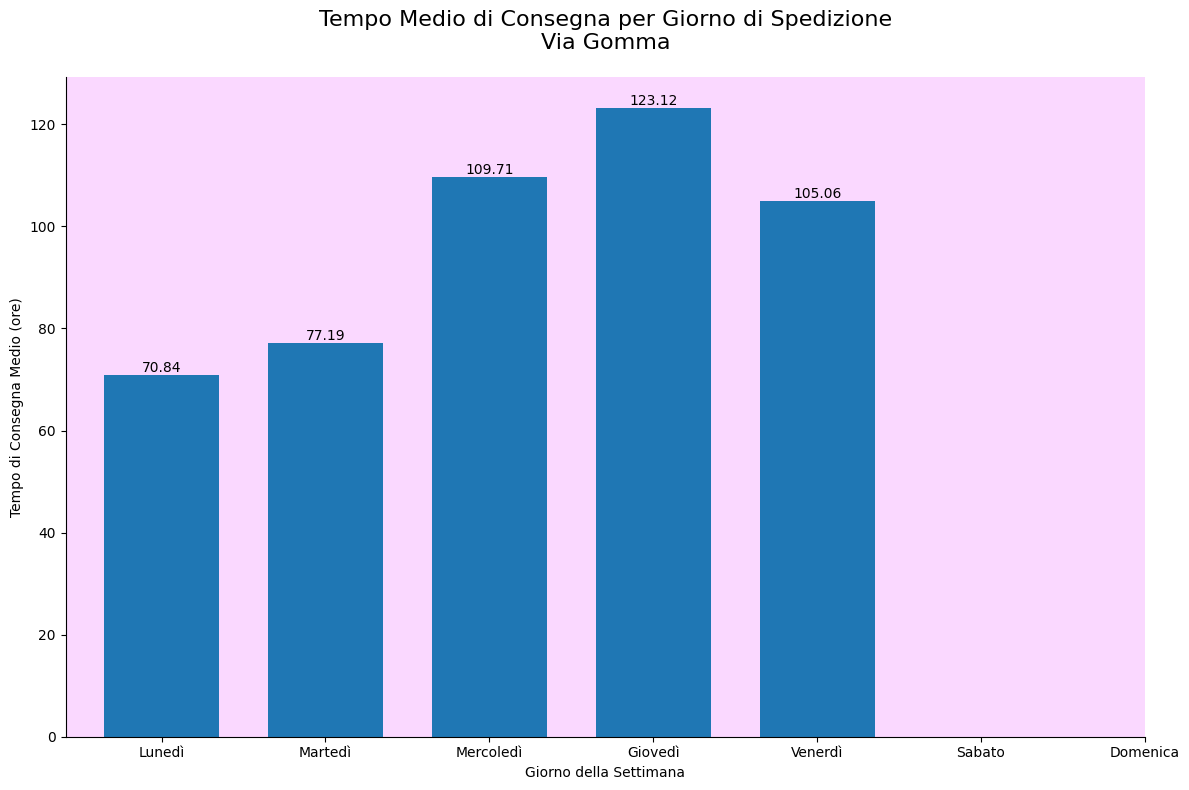

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leggi il CSV
dataset = pd.read_csv('delivery_ViaGomma.csv')

# Debug: stampa i primi record e i valori unici di WDAY
print("Valori unici in WDAY:", sorted(dataset['WDAY'].unique()))
print("\nPrimi 5 record del dataset:")
print(dataset[['SHIPPING_DATE', 'WDAY', 'DELIVERY_TIME_HH']].head())

# Calcola la media del tempo di consegna per giorno della settimana
average_delivery_time = dataset.groupby('WDAY')['DELIVERY_TIME_HH'].mean()

# Debug: stampa i valori medi prima del reindex
print("\nMedie per giorno prima del reindex:")
for day, value in average_delivery_time.items():
    print(f"Giorno {day}: {value:.2f} ore")

# Ordina i giorni della settimana
weekday_order = [0, 1, 2, 3, 4]
average_delivery_time = average_delivery_time.reindex(weekday_order)


# Creiamo la figura
plt.figure(figsize=(12, 8))

# Creiamo le barre
bars = plt.bar(average_delivery_time.index, average_delivery_time.values, color='#1f77b4', width=0.7)

# Aggiungiamo le etichette sopra ogni barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}',  # Mostra il valore con due decimali
             ha='center', va='bottom')

# Personalizziamo il grafico
plt.title('Tempo Medio di Consegna per Giorno di Spedizione\nVia Gomma', fontsize=16, color='black', pad=20)
plt.xlabel('Giorno della Settimana', color='black')
plt.ylabel('Tempo di Consegna Medio (ore)', color='black')

# Imposta le etichette per i giorni della settimana
plt.xticks(ticks=range(7), labels=['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica'])
plt.gca().set_facecolor("#FAD8FF")

# Rimuoviamo i bordi
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Aggiustiamo i margini
plt.tight_layout()

# Debug: stampa il conteggio delle righe per ogni giorno
print("\nNumero di righe per ogni giorno:")
print(dataset['WDAY'].value_counts().sort_index())

plt.show()